En esta práctica vamos a generar una secuencia de valores pesos de diferentes hombres.

Tienes que, usando las librerías vistas en este tema y google collab, mostrar:

* Media, mediana y rangos.
* Desviación estándar muestral.
* Dibujar distribución de datos e histograma.
* Buscar outliers (con los dos métodos) y observaciones influyentes (si las hay).
* Estandarizar los datos de las tres formas que se han visto.

A continuación tenéis el código con el que debéis comenzar vuestra práctica.



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.compose import make_column_selector

# Generación de datos
# ==============================================================================
mu, sigma = 75, 15 # media y desviación típica de la población
# Generamos una muestra de tamaño 500
np.random.seed(1)
datos = np.random.normal(mu, sigma, 500)
# Cambiamos los valores de dos datos para convertirlos en outliers
datos[50]=100
datos[75]=1
datos[150]=250
datos[300]=-10

In [14]:
# Media, mediana y rangos.
media = np.mean(datos)
print("Media: ", media)
mediana = np.median(datos)
print("Mediana: ", mediana)
rango = np.ptp(datos) # np.max(datos) - np.min(datos)
print("Rango: ", rango)

Media:  75.88254434431963
Mediana:  75.58180382827763
Rango:  260.0


In [15]:
# Desviación estándar muestral.
desviacion_estandar_muestral = np.std(datos, ddof=1)
print("Desviación estándar muestral:", desviacion_estandar_muestral)

# Desviación estándar muestral (ddof=1)
# Desviación estándar completa (ddof=0) / No hace falta indicar

Desviación estándar muestral: 17.44545430143048


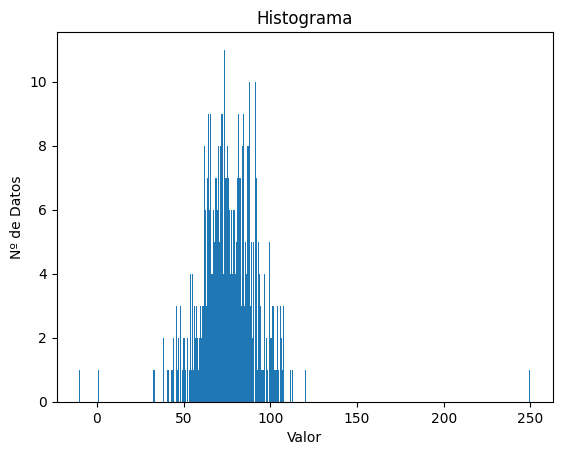

In [16]:
# Dibujar distribución de datos e histograma.
plt.hist(datos, 500)
plt.ylabel('Nº de Datos')
plt.xlabel('Valor')
plt.title('Histograma')
plt.show()

In [17]:
# Buscar outliers (con los dos métodos) y observaciones influyentes (si las hay)

# Método 1

# CRITERIO 1: PROBABILIDAD GLOBAL
# Probabilidad de la muestra de estar dentro de las bandas
p_g = 0.95

# Probabilidad global de una cola
alfa_g = (1-p_g)/2

# Probabilidad  de las colas para un solo dato
alfa = 1-(1-alfa_g)**(1/len(datos))

## CRITERIO 2:  Criterio Chauvenet

#alfa = 1/(2*len(datos))
Z_alfa = st.norm.ppf(1-alfa/2)

# Impresión de resultados

alfa = round(alfa, 5)
Z_alfa = round(Z_alfa, 5)
print(f" Alfa = {alfa}")
print(f" CUANTIL Z_(1-alfa/2) = {Z_alfa}")

# Cálculo de bandas
xL = round(np.mean(datos) - Z_alfa * np.std(datos), 4)
xU = round(np.mean(datos) + Z_alfa * np.std(datos), 4)
print(f" Banda = [{xL}, {xU}]")

for i in range(len(datos)):
    if datos[i] < xL  or datos[i] > xU:
        print(f" El dato[{i}] = {datos[i]} es un outlier")

 Alfa = 5e-05
 CUANTIL Z_(1-alfa/2) = 4.05268
 Banda = [5.2524, 146.5127]
 El dato[75] = 1.0 es un outlier
 El dato[150] = 250.0 es un outlier
 El dato[300] = -10.0 es un outlier


In [18]:
# Método 2
Q1 = np.quantile(datos, 0.25)
Q3 = np.quantile(datos, 0.75)
IQR = Q3 - Q1
k = 3
xL = Q1 - k * IQR
xU = Q3 + k * IQR
print(f"Bandas: [{xL},{xU}]")
for i in  range(len(datos)):
    if datos[i] < xL  or datos[i]>xU:
        print(f" El dato[{i}] = {datos[i]} es un outlier")

Bandas: [4.402207827140614,147.48191492762493]
 El dato[75] = 1.0 es un outlier
 El dato[150] = 250.0 es un outlier
 El dato[300] = -10.0 es un outlier


In [19]:
# Valores Influyentes
phi = np.zeros(len(datos))
for i in range(len(datos)):
  datos_aux = datos
  datos_sin_i = np.delete(datos_aux, i)
  phi[i] = np.mean(datos_sin_i)

for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato [{i}] = '{datos[i]}' es una observación influyente para la media")

In [20]:
# Estandarizar los datos de las tres formas que se han visto.
datos_columna = np.column_stack(datos)
Data = pd.DataFrame(datos_columna.flatten(), columns=['Peso'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()

# Standard scaler (Z-Score)
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler
preprocessor_MM = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

# Decimal Scaler
m = int(np.floor(np.log10(np.max(np.abs(datos)))))
datos_escala_decimal = datos / 10**m
Data_decimal = pd.DataFrame(datos_escala_decimal.flatten(), columns=['Peso'])

Data_prep_decimal = preprocessor_SS.fit_transform(Data_decimal)
Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_MM = preprocessor_MM.fit_transform(Data)

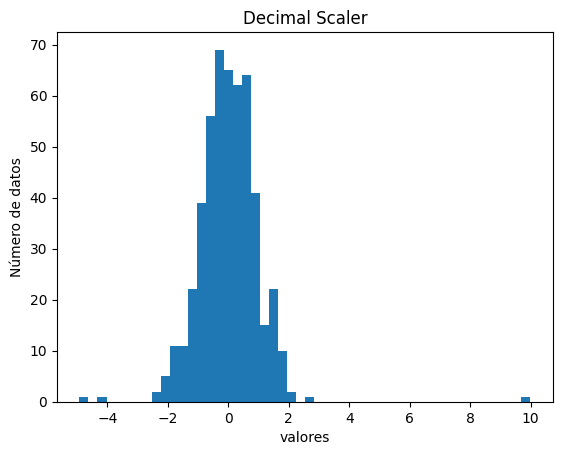

In [21]:
plt.hist(Data_prep_decimal, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Decimal Scaler')
plt.show()

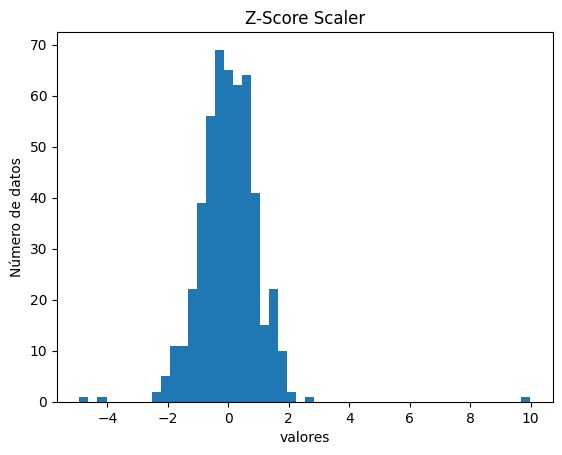

In [22]:
plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Z-Score Scaler')
plt.show()

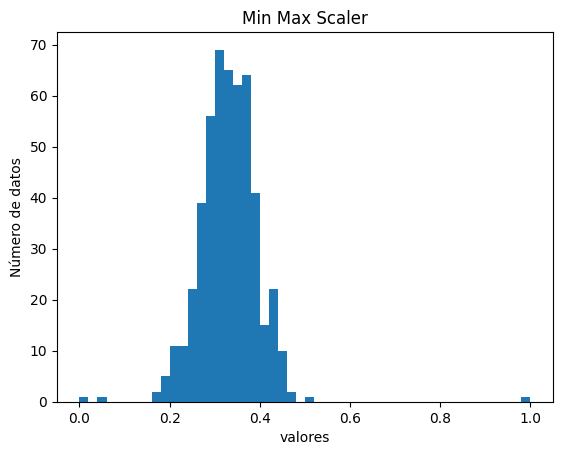

In [23]:
plt.hist(Data_prep_MM, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Min Max Scaler')
plt.show()